Name: Paola Granados 

Labpartner(s): Destiny Martinez

In [2]:
#import statements go here
import numpy as np 
import xarray as xr
import pandas as pd

In [3]:
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import matplotlib.pyplot as plt

# Class 10.1

# Warmups 10.1

If you do not complete the warmup during the class period, complete for homework and review/expand for weekly practice. These are basic coding skills you need to be comfortable with. Work on the following for 25 min and then we will go over them together:

**W.1** Write a function that given two numbers returns the maximum. Figure out the maximum number using logical control (no pre-made max functions)

In [6]:
#create function maxnum which will return the maximum number 
def maxnum(num1,num2):#inputs are the two numbers
    if num1 > num2:
        maxnum = num1
    else:
        maxnum = num2 
    return maxnum 

In [7]:
#test our function 
maxnum(3,5)

5

In [8]:
maxnum(100,25)

100

**W.2** Modify the function we developed in Lab. 9.2 W.1 to return n consective even integers

In [11]:
def evennum(n):
    start = 2 
    even_list = [start]
    next_num = start
    while n>1:
        n=n-1
        next_num= next_num +2
        even_list = even_list + [next_num]
    
    return even_list

In [12]:
#test function 
evennum(5)

[2, 4, 6, 8, 10]

In [13]:
evennum(10)

[2, 4, 6, 8, 10, 12, 14, 16, 18, 20]

# Lecture 10.1

### Agenda:
- Announcements
    - changes in gradiing proccess, deadlines
    - Done with datacamp
- Shoutouts for good work (Paola, Luz)
- Lab 7.2 review
- Cartopy
- Movies (with Victoria Garza)


#### Announcements

Because my health has improved since the beginning of the term, and as we move into the more advanced material, I am taking over the grading from Adrian. Join me in thanking him for his assistance to us all in a time of need. I am working on catching up on the grading now and will finish this next week. So check your grades for updates and to see if you need to redo anything. I have added my research assistant and scientific programmer Victoria Garza to slack. She is available to you all for questions as we move into the advanced material.

I did go back and re-grade some labs (4.2 in particular) as I noted they were missing some material. Please see my notes if your grade changed and submit the missing material.

Previously I mentioned that no late labs will be accepted after 4/15, at which time you all will be working on your final projects. **Further, all labs through Lab 9.2 need to have a satisfactory grade (no zeros) by 4/1 to pass the class.** Reminder thet the last drop date is 4/6. The mastery of this beginning material is needed to complete this course. This includes the functions exercise and the expected grade assignment.

We are done with datacamp! (But feel free to use it as a resource as you like)

#### Shoutouts

- Paola is student of the week for all of her excellent work, well done! 
- Luz did a great job on her CV, very creative.


### Main Lecture

#### Motivation: making nice maps and animating data are great skills for scientists to engage audiences with our results, but also to better understand the systems we are studying. 

Examples:
- Gulf of Mexico sattellite data animation
- Animation from recent SEEMS seminar speaker Dr. Scott James from Baylor


#### 7.2 Review
Today we are building on what we did in Lab 7.2, which was using xarray to plot ocean model output. The vast majority of you did not complete this lab satisfactorily, which probably had something to do with it being the week after the freeze.

Since the url I used before is no longer valid, I'm going to use the netcdf subset option on the HYCOM website, which also lets me get a subset of the data (and thus a smaller file). See https://www.hycom.org/data/gomu0pt04/expt-90pt1m000 data access button

In [37]:
file = 'C:/Users/Pgran/Documents/Python Scripts/Untitled Folder/2021.nc4'

In [39]:
ssh_data = xr.open_dataset(file, decode_times=False)

In [40]:
ssh_data

<xarray.Dataset>
Dimensions:  (lat: 346, lon: 541, time: 1)
Coordinates:
  * time     (time) float64 1.86e+05
  * lat      (lat) float64 18.12 18.16 18.2 18.24 ... 31.8 31.84 31.88 31.92
  * lon      (lon) float64 -98.0 -97.96 -97.92 -97.88 ... -76.48 -76.44 -76.4
Data variables:
    surf_el  (time, lat, lon) float32 ...
Attributes:
    classification_level:      UNCLASSIFIED
    distribution_statement:    Approved for public release. Distribution unli...
    downgrade_date:            not applicable
    classification_authority:  not applicable
    institution:               Naval Oceanographic Office
    source:                    HYCOM archive file
    history:                   archv2ncdf3z
    field_type:                instantaneous
    Conventions:               CF-1.6 NAVO_netcdf_v1.1
    History:                   Translated to CF-1.0 Conventions by Netcdf-Jav...
    geospatial_lat_min:        18.1200008392334
    geospatial_lat_max:        31.920000076293945
    geospatial_lon_min:        -98.0
    geospatial_lon_max:        -76.4000244140625

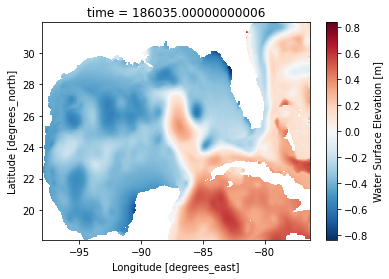

In [41]:
ssh_data.surf_el.plot()

#### Cartopy https://scitools.org.uk/cartopy/docs/latest/

Now let's make a nice plot using Catopy

In [19]:
import cartopy.crs as ccrs   #import map styles/types
import cartopy.feature as cfeature  # features such as the ocean, coastlines rivers, etc
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER

There are a number of differnt map projections available in Cartopy.  

C:\Users\Pgran\anaconda3\lib\site-packages\cartopy\io\__init__.py:260: DownloadWarning: Downloading: https://naciscdn.org/naturalearth/110m/physical/ne_110m_coastline.zip
  warnings.warn('Downloading: {}'.format(url), DownloadWarning)


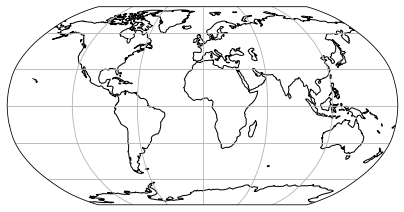

In [23]:
# plot a basic map with no data
plt.figure(figsize=(7, 5))
ax = plt.axes(projection=ccrs.Robinson())
ax.coastlines(resolution='110m')
ax.gridlines()

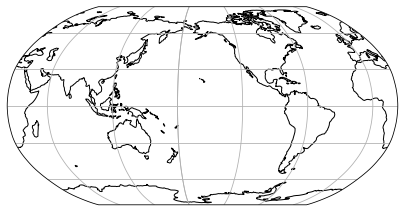

In [24]:
# plot a basic map with no data, rotated
plt.figure(figsize=(7, 5))
ax = plt.axes(projection=ccrs.Robinson(central_longitude = 203)) # this rotates the emap
ax.coastlines(resolution='110m')
ax.gridlines()

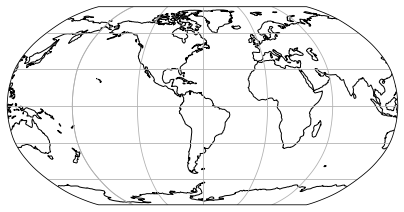

In [25]:
# plot a basic map with no data, rotated
plt.figure(figsize=(7, 5))
ax = plt.axes(projection=ccrs.Robinson(central_longitude = 300))
ax.coastlines(resolution='110m')
ax.gridlines()

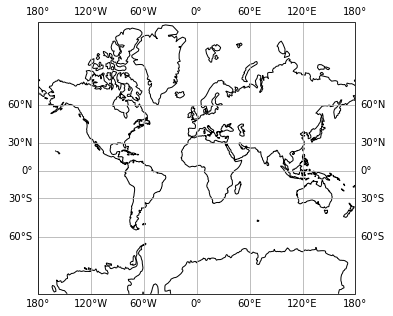

In [26]:
# plot a basic map with no data
plt.figure(figsize=(7, 5))
ax = plt.axes(projection=ccrs.Mercator()) # different map projection
ax.coastlines(resolution='110m')
ax.gridlines(draw_labels=True)
# note this has grid labels, this is being updated for all projections in the latest version of cartopy 0.18.0

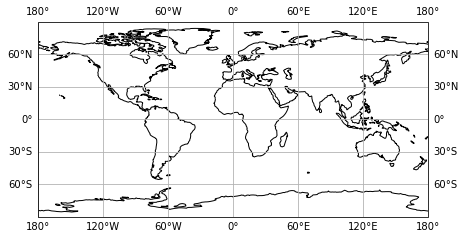

In [36]:
# plot a basic map with no data
plt.figure(figsize=(7, 5))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.coastlines(resolution='110m')
ax.gridlines(draw_labels=True)

Let's zoom into the Gulf of Mexico. We want to set the lat and lon range to match our HYCOM data. How do we find this?

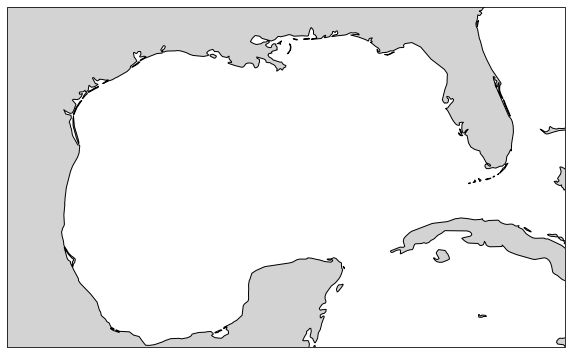

In [37]:
fig, ax = plt.subplots(figsize =(10,8))  
ax = plt.axes(projection=ccrs.PlateCarree())
ax.set_extent([260,282, 18.11, 31.5]) 

#Sets the land onto the projection with the right color and scale
land_50m = cfeature.NaturalEarthFeature('physical', 'land', '50m',
                                    edgecolor='black',
                                    facecolor='lightgrey')
ax.add_feature(land_50m)

Now let's add some data

In [ ]:
# what does our data look like again?
ssh_data

In [29]:
fig, ax = plt.subplots(figsize =(10,8))  
ax = plt.axes(projection=ccrs.PlateCarree())
ax.set_extent([260,282, 18.11, 31.5])

#Sets the land onto the projection with the right color and scale
land_50m = cfeature.NaturalEarthFeature('physical', 'land', '50m',
                                    edgecolor='black',
                                    facecolor='lightgrey')
ax.add_feature(land_50m)

# let's fill in the following:
x = 
y = 
var =  

#Contours the data on tho the map projection
p = ax.contourf(x, y,var, transform=ccrs.PlateCarree()) # projection is needed in every plot call
    

SyntaxError: invalid syntax (<ipython-input-29-e7adcc1b375d>, line 12)

Now I'm going to take a bunch of features from Victoria's demo (in github as Hycom-CartopyDemo) and add them in.

#### Making Movies demo by Victoria 
(also see ppt slides in github)

# Lab 10.1

**E.1** Pick two of the examples in the Cartopy gallery (https://scitools.org.uk/cartopy/docs/latest/gallery/index.html) and go through the code. Make three modifications for each of the two examples and document what you did.

Example 1: Features

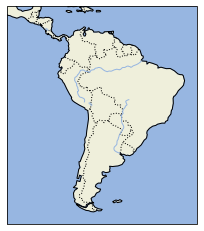

In [33]:
#change the extent to SOuth America 

def main():
    fig = plt.figure()
    ax = fig.add_subplot(1, 1, 1, projection=ccrs.PlateCarree())
    ax.set_extent([-100, -30, -60, 20], crs=ccrs.PlateCarree())

    ax.add_feature(cfeature.LAND)
    ax.add_feature(cfeature.OCEAN)
    ax.add_feature(cfeature.COASTLINE)
    ax.add_feature(cfeature.BORDERS, linestyle=':')
    ax.add_feature(cfeature.LAKES, alpha=0.5)
    ax.add_feature(cfeature.RIVERS)

    plt.show()


if __name__ == '__main__':
    main()

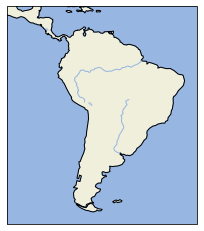

In [34]:
#remove country borders
def main():
    fig = plt.figure()
    ax = fig.add_subplot(1, 1, 1, projection=ccrs.PlateCarree())
    ax.set_extent([-100, -30, -60, 20], crs=ccrs.PlateCarree())

    ax.add_feature(cfeature.LAND)
    ax.add_feature(cfeature.OCEAN)
    ax.add_feature(cfeature.COASTLINE)
    #ax.add_feature(cfeature.BORDERS, linestyle=':')
    ax.add_feature(cfeature.LAKES, alpha=0.5)
    ax.add_feature(cfeature.RIVERS)

    plt.show()


if __name__ == '__main__':
    main()

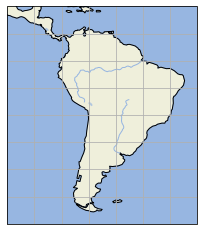

In [38]:
#add gridlines
def main():
    fig = plt.figure()
    ax = fig.add_subplot(1, 1, 1, projection=ccrs.PlateCarree())
    ax.set_extent([-100, -30, -60, 20], crs=ccrs.PlateCarree())

    ax.add_feature(cfeature.LAND)
    ax.add_feature(cfeature.OCEAN)
    ax.add_feature(cfeature.COASTLINE)
    #ax.add_feature(cfeature.BORDERS, linestyle=':')
    ax.add_feature(cfeature.LAKES, alpha=0.5)
    ax.add_feature(cfeature.RIVERS)
    
    ax.gridlines(dms=True, x_inline=False, y_inline=False)

    plt.show()


if __name__ == '__main__':
    main()

In [ ]:
Example 2: Contour Labels 

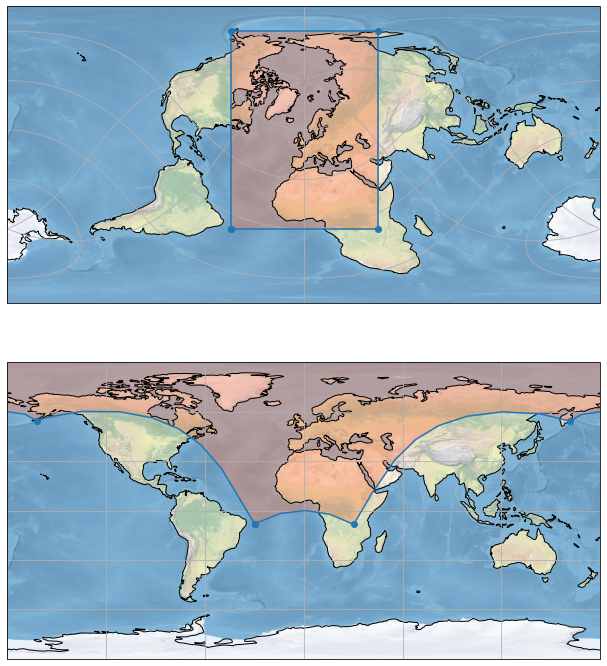

In [61]:
#change fig size and box top
def main():
    rotated_pole = ccrs.RotatedPole(pole_latitude=45, pole_longitude=180)

    box_top = 75
    x, y = [-44, -44, 45, 45, -44], [-45, box_top, box_top, -45, -45]
    fig = plt.figure(figsize=(15,12))

    ax = fig.add_subplot(2, 1, 1, projection=rotated_pole)
    ax.stock_img()
    ax.coastlines()
    ax.plot(x, y, marker='o', transform=rotated_pole)
    ax.fill(x, y, color='coral', transform=rotated_pole, alpha=0.4)
    ax.gridlines()

    ax = fig.add_subplot(2, 1, 2, projection=ccrs.PlateCarree())
    ax.stock_img()
    ax.coastlines()
    ax.plot(x, y, marker='o', transform=rotated_pole)
    ax.fill(x, y, transform=rotated_pole, color='coral', alpha=0.4)
    ax.gridlines()

    plt.show()


if __name__ == '__main__':
    main()

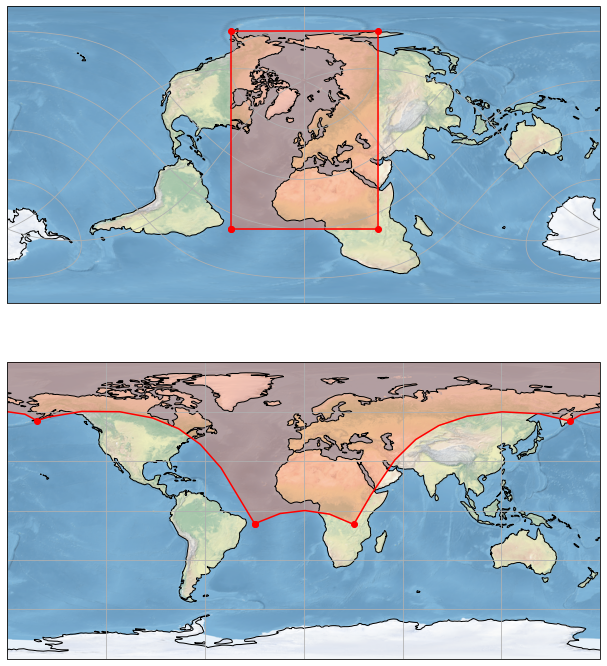

In [64]:
def main():
    rotated_pole = ccrs.RotatedPole(pole_latitude=45, pole_longitude=180)

    box_top = 75
    x, y = [-44, -44, 45, 45, -44], [-45, box_top, box_top, -45, -45]
    fig = plt.figure(figsize=(15,12))

    ax = fig.add_subplot(2, 1, 1, projection=rotated_pole)
    ax.stock_img()
    ax.coastlines()
    ax.plot(x, y, marker='o', transform=rotated_pole, color ="r")
    ax.fill(x, y, color='coral', transform=rotated_pole, alpha=0.4)
    ax.gridlines()

    ax = fig.add_subplot(2, 1, 2, projection=ccrs.PlateCarree())
    ax.stock_img()
    ax.coastlines()
    ax.plot(x, y, marker='o', transform=rotated_pole, color = "r")
    ax.fill(x, y, transform=rotated_pole, color='coral', alpha=0.4)
    ax.gridlines()

    plt.show()


if __name__ == '__main__':
    main()

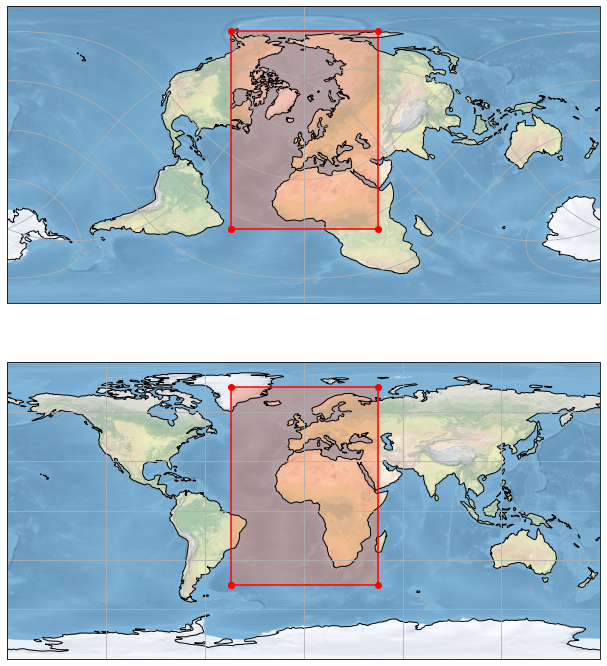

In [69]:
#same boundary doesn't work for different projections
def main():
    rotated_pole = ccrs.RotatedPole(pole_latitude=45, pole_longitude=180)

    box_top = 75
    x, y = [-44, -44, 45, 45, -44], [-45, box_top, box_top, -45, -45]
    fig = plt.figure(figsize=(15,12))

    ax = fig.add_subplot(2, 1, 1, projection=rotated_pole)
    ax.stock_img()
    ax.coastlines()
    ax.plot(x, y, marker='o', transform=rotated_pole, color ="r")
    ax.fill(x, y, color='coral', transform=rotated_pole, alpha=0.4)
    ax.gridlines()

    ax = fig.add_subplot(2, 1, 2, projection=ccrs.PlateCarree())
    ax.stock_img()
    ax.coastlines()
    ax.plot(x, y, marker='o', transform=ccrs.PlateCarree(), color = "r")
    ax.fill(x, y, transform=ccrs.PlateCarree(), color='coral', alpha=0.4)
    ax.gridlines()

    plt.show()


if __name__ == '__main__':
    main()

**E.2** Download and plot HYCOM sea surface temperature for two diferent days (perhaps different seasons or sequential days, up to you) using cartopy. Add a grid, lat/lon labels, and annotate by adding a marker of the city/town you are living in. Make sure you adjust the colorbar to be a good fit to the data.


In [42]:
#import sea surface temp data
Feb2021 = 'C:/Users/Pgran/Documents/Python Scripts/Untitled Folder/Feb2021.nc4'
Aug2020 = 'C:/Users/Pgran/Documents/Python Scripts/Untitled Folder/Aug2020.nc4'

In [43]:
Feb_data = xr.open_dataset(Feb2021, decode_times=False)
Aug_data = xr.open_dataset(Aug2020, decode_times=False)

In [44]:
Aug_data

<xarray.Dataset>
Dimensions:     (depth: 1, lat: 346, lon: 541, time: 1)
Coordinates:
  * time        (time) float64 1.81e+05
  * depth       (depth) float64 0.0
  * lat         (lat) float64 18.12 18.16 18.2 18.24 ... 31.8 31.84 31.88 31.92
  * lon         (lon) float64 -98.0 -97.96 -97.92 -97.88 ... -76.48 -76.44 -76.4
Data variables:
    water_temp  (time, depth, lat, lon) float32 ...
Attributes:
    classification_level:      UNCLASSIFIED
    distribution_statement:    Approved for public release. Distribution unli...
    downgrade_date:            not applicable
    classification_authority:  not applicable
    institution:               Naval Oceanographic Office
    source:                    HYCOM archive file
    history:                   archv2ncdf3z
    field_type:                instantaneous
    Conventions:               CF-1.6 NAVO_netcdf_v1.1
    History:                   Translated to CF-1.0 Conventions by Netcdf-Jav...
    geospatial_lat_min:        18.1200008392334
    geospatial_lat_max:        31.920000076293945
    geospatial_lon_min:        -98.0
    geospatial_lon_max:        -76.4000244140625

Text(-97.4975, 25.9017, 'Brownsville')

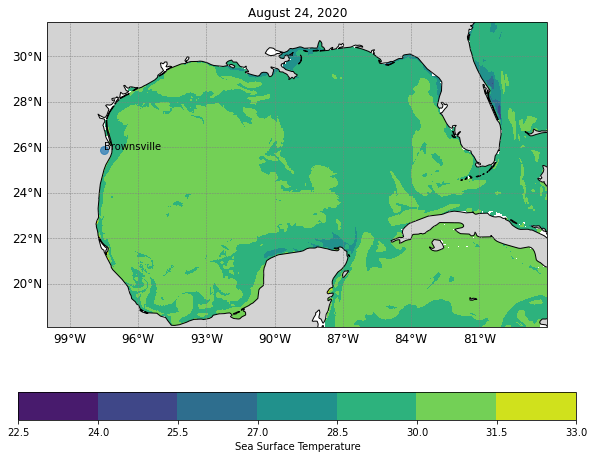

In [52]:
fig, ax = plt.subplots(figsize =(10,8))  
ax = plt.axes(projection=ccrs.PlateCarree())
ax.set_extent([260,282, 18.11, 31.5]) 
ax.set_title("August 24, 2020")
ax.set_xlabel("Longitude")

#Sets the land onto the projection with the right color and scale
land_50m = cfeature.NaturalEarthFeature('physical', 'land', '50m',
                                    edgecolor='black',
                                    facecolor='lightgrey')
ax.add_feature(land_50m)



# let's fill in the following:
x = Aug_data.lon
y = Aug_data.lat
var =  Aug_data.water_temp[0,0,:,:]

#Contours the data on tho the map projection
p = ax.contourf(x, y,var, transform=ccrs.PlateCarree())
cbar = plt.colorbar(mappable = p, orientation = "horizontal")
cbar.set_label("Sea Surface Temperature")


gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=False,
          linewidth=.5, color='gray', linestyle='--')
gl.xlabels_bottom = True    
gl.ylabels_left = True
gl.xlabel_style = {'size' : 12}
gl.ylabel_style = {'size' : 12}
#ax.plot(-98.2631,-26.1004,marker="o",markersize=8,transform=ccrs.Geodetic())
ax.plot(-97.4975,25.9017, marker='o', markersize=8,
            alpha=0.7, transform=ccrs.Geodetic())
ax.text(-97.4975, 25.9017, 'Brownsville', transform=ccrs.Geodetic())


Text(-97.4975, 25.9017, 'Brownsville')

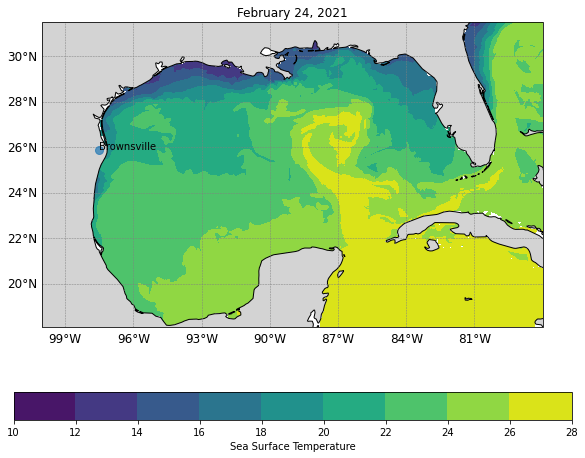

In [53]:
fig, ax = plt.subplots(figsize =(10,8))  
ax = plt.axes(projection=ccrs.PlateCarree())
ax.set_extent([260,282, 18.11, 31.5]) 
ax.set_title("February 24, 2021")

#Sets the land onto the projection with the right color and scale
land_50m = cfeature.NaturalEarthFeature('physical', 'land', '50m',
                                    edgecolor='black',
                                    facecolor='lightgrey')
ax.add_feature(land_50m)

# let's fill in the following:
x = Feb_data.lon
y = Feb_data.lat
var =  Feb_data.water_temp[0,0,:,:]

#Contours the data on tho the map projection
p = ax.contourf(x, y,var, transform=ccrs.PlateCarree())
cbar = plt.colorbar(mappable = p, orientation = "horizontal")
cbar.set_label("Sea Surface Temperature")

gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=False,
          linewidth=.5, color='gray', linestyle='--')
gl.xlabels_bottom = True    
gl.ylabels_left = True
gl.xlabel_style = {'size' : 12}
gl.ylabel_style = {'size' : 12}
ax.plot(-97.4975,25.9017, marker='o', markersize=8,
            alpha=0.7, transform=ccrs.Geodetic())
ax.text(-97.4975, 25.9017, 'Brownsville', transform=ccrs.Geodetic())

**E.3** Animate some data. Using Davinci or the movie software of your choice, create an animated plot. This can be of any data you like. Put the code you used to plot here, and upload the resulting movie file to github.

You will demonstrate your animation to the class next Monday.

In [4]:
Aug2020_all = "C:/Users/Pgran/Downloads/Aug2020_alldepths.nc4"
Feb2020_all = "C:/Users/Pgran/Downloads/Feb2020_alldepths.nc4"

In [5]:
Feball = xr.open_dataset(Feb2020_all, decode_times=False)
Augall = xr.open_dataset(Aug2020_all, decode_times=False)

In [6]:
Feball

<xarray.Dataset>
Dimensions:     (depth: 40, lat: 346, lon: 541, time: 1)
Coordinates:
  * time        (time) float64 1.766e+05
  * depth       (depth) float64 0.0 2.0 4.0 6.0 ... 2.5e+03 3e+03 4e+03 5e+03
  * lat         (lat) float64 18.12 18.16 18.2 18.24 ... 31.8 31.84 31.88 31.92
  * lon         (lon) float64 -98.0 -97.96 -97.92 -97.88 ... -76.48 -76.44 -76.4
Data variables:
    water_temp  (time, depth, lat, lon) float32 ...
Attributes:
    classification_level:      UNCLASSIFIED
    distribution_statement:    Approved for public release. Distribution unli...
    downgrade_date:            not applicable
    classification_authority:  not applicable
    institution:               Naval Oceanographic Office
    source:                    HYCOM archive file
    history:                   archv2ncdf3z
    field_type:                instantaneous
    Conventions:               CF-1.6 NAVO_netcdf_v1.1
    History:                   Translated to CF-1.0 Conventions by Netcdf-Jav...
    geospatial_lat_min:        18.1200008392334
    geospatial_lat_max:        31.920000076293945
    geospatial_lon_min:        -98.0
    geospatial_lon_max:        -76.4000244140625

<ipython-input-33-0d2b98d9e425>:31: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "quality" which is no longer supported as of 3.3 and will become an error two minor releases later
  fig.savefig("C:/Users/Pgran/Documents/ENVRClasses/MARS4300/feb4000", bbox_inches="tight",quality=95,dpi=500, facecolor ="w")


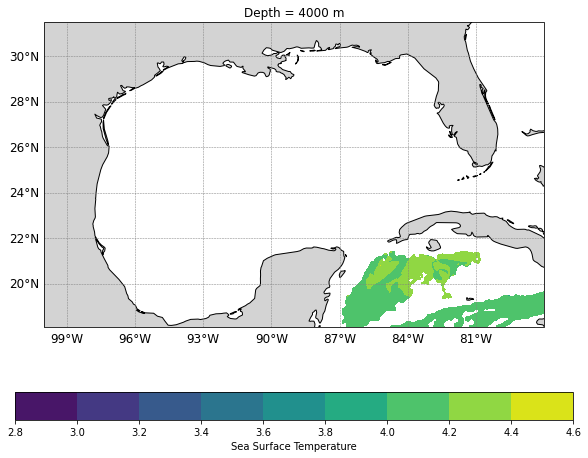

In [33]:
fig, ax = plt.subplots(figsize =(10,8))  
ax = plt.axes(projection=ccrs.PlateCarree())
ax.set_extent([260,282, 18.11, 31.5]) 
ax.set_title("Depth = 4000 m")

#Sets the land onto the projection with the right color and scale
land_50m = cfeature.NaturalEarthFeature('physical', 'land', '50m',
                                    edgecolor='black',
                                    facecolor='lightgrey')
ax.add_feature(land_50m)

# let's fill in the following:
x = Feball.lon
y = Feball.lat
var =  Feball.water_temp[0,38,:,:]

#Contours the data on tho the map projection
p = ax.contourf(x, y,var, transform=ccrs.PlateCarree())
cbar = plt.colorbar(mappable = p, orientation = "horizontal")
cbar.set_label("Sea Surface Temperature")

gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=False,
          linewidth=.5, color='gray', linestyle='--')
gl.xlabels_bottom = True    
gl.ylabels_left = True
gl.xlabel_style = {'size' : 12}
gl.ylabel_style = {'size' : 12}

Save_img = "C:/Users/Pgran/Documents/ENVRClasses/MARS4300"
#fig.savefig(Save_img +str(date.strftime("%m-%d-%Y")), bbox_inches='tight', quality = 95, dpi = 500)
fig.savefig("C:/Users/Pgran/Documents/ENVRClasses/MARS4300/feb4000", bbox_inches="tight",quality=95,dpi=500, facecolor ="w")
#plt.savefig('sin.png')
#plt.savefig('testing2500.png', dpi = 900)

In [78]:
Feball.depth

<xarray.DataArray 'depth' (depth: 40)>
array([0.00e+00, 2.00e+00, 4.00e+00, 6.00e+00, 8.00e+00, 1.00e+01, 1.20e+01,
       1.50e+01, 2.00e+01, 2.50e+01, 3.00e+01, 3.50e+01, 4.00e+01, 4.50e+01,
       5.00e+01, 6.00e+01, 7.00e+01, 8.00e+01, 9.00e+01, 1.00e+02, 1.25e+02,
       1.50e+02, 2.00e+02, 2.50e+02, 3.00e+02, 3.50e+02, 4.00e+02, 5.00e+02,
       6.00e+02, 7.00e+02, 8.00e+02, 9.00e+02, 1.00e+03, 1.25e+03, 1.50e+03,
       2.00e+03, 2.50e+03, 3.00e+03, 4.00e+03, 5.00e+03])
Coordinates:
  * depth    (depth) float64 0.0 2.0 4.0 6.0 8.0 ... 2.5e+03 3e+03 4e+03 5e+03
Attributes:
    long_name:               Depth
    standard_name:           depth
    units:                   m
    positive:                down
    axis:                    Z
    NAVO_code:               5
    _CoordinateAxisType:     Height
    _CoordinateZisPositive:  down

In [35]:
Feball.depth[38]

<xarray.DataArray 'depth' ()>
array(4000.)
Coordinates:
    depth    float64 4e+03
Attributes:
    long_name:               Depth
    standard_name:           depth
    units:                   m
    positive:                down
    axis:                    Z
    NAVO_code:               5
    _CoordinateAxisType:     Height
    _CoordinateZisPositive:  down